In [25]:
# numpy is a library for working with arrays and matrices.
# pandas is a library for data manipulation and analysis.
# matplotlib.pyplot is a library for creating visualizations such as graphs and charts.
# seaborn is a library for creating statistical graphics.
# missingno is a library for visualizing missing data.
# squarify is a library for creating treemaps, which are visualizations of hierarchical data.
# plotly.offline is a library for creating interactive visualizations.
# By importing these libraries, the code is setting up the environment to perform data analysis and visualization tasks.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify
import plotly.offline as py

In [26]:
# This line of code is initializing the Plotly notebook mode for offline plotting, meaning that the plots generated using Plotly library will be displayed directly in the Jupyter Notebook or JupyterLab environment, rather than opening in a separate browser window.

py.init_notebook_mode(connected=True)

In [27]:
# Importing specific modules from plotly and sklearn libraries
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
%matplotlib inline
plt.style.use('ggplot')

In [28]:
#Read data from 'State_time_series.csv' file and store in 'state_data' variable

state_data = pd.read_csv('DM_Project\State_time_series.csv', parse_dates = ['Date'])

In [29]:
#This code prints the column names of the dataframe state_data.
state_data.columns

Index(['Date', 'RegionName', 'DaysOnZillow_AllHomes',
       'HomesSoldAsForeclosuresRatio_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'Medi

<AxesSubplot:>

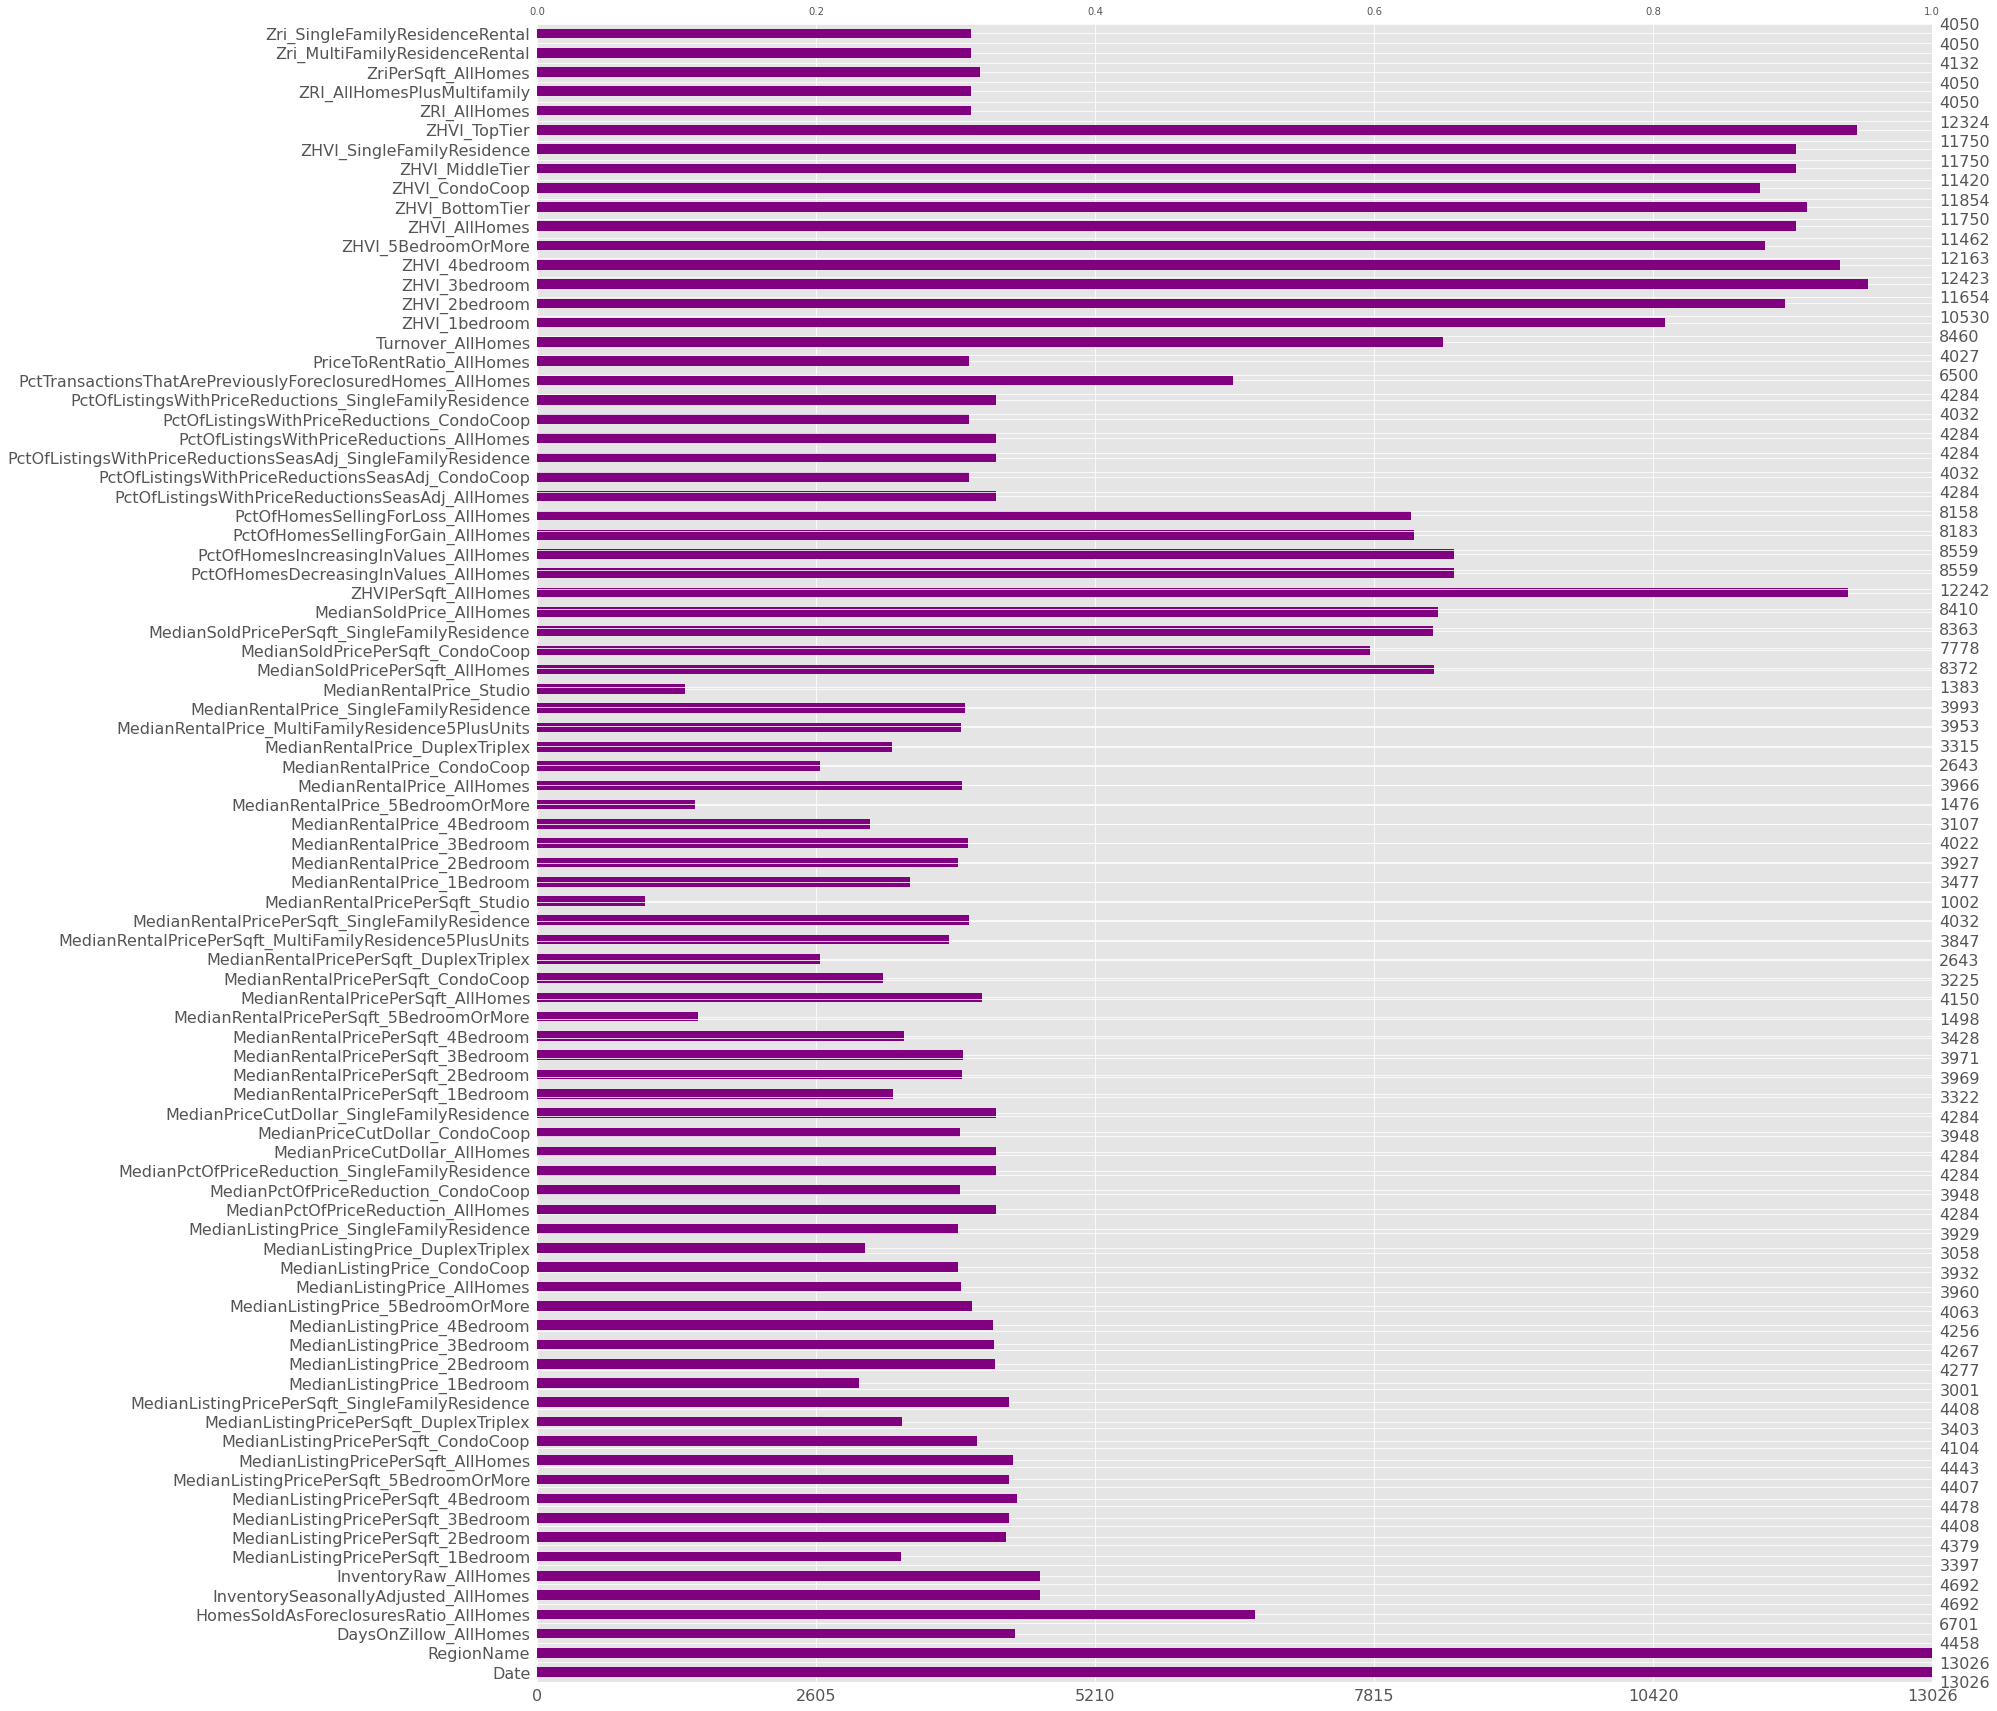

In [30]:
# Plot a bar graph to visualize missing values in the dataframe.
# The 'msno' package is used for this, with the 'bar' function to generate a bar chart.

msno.bar(state_data, color='purple')

In [31]:
# Analysis
#Print the date range of the dataset

print('Date range:{} to {}'.format(state_data['Date'].min(), state_data['Date'].max()))

#Print the number of unique states in the dataset
print('Number of States', state_data['RegionName'].nunique())

Date range:1996-04-30 00:00:00 to 2017-08-31 00:00:00
Number of States 52


In [32]:
# Resample the data on a monthly basis and calculate the mean of each month
# based on the "Date" column and store it in "months_data"


months_data = state_data.resample('M', on='Date').mean()

# Reset the index of "months_data" to have a proper date range
months_data = months_data.reset_index()

In [33]:
# Sample data by region name
#This code groups the state_data dataframe by 'RegionName' and calculates the mean of the columns for each group. 
#It then assigns the resulting dataframe to a new variable called 'state_vise'. 


state_vise = state_data.groupby(['RegionName']).mean()

In [34]:
# This code creates a Plotly line chart for the variable "DaysOnZillow_AllHomes" in the dataset "months_data", 
# which shows the trend of the average number of days a home stays on Zillow for each month. 
# The layout of the chart includes a title, 
# x-axis range and range selector to enable zooming and panning along the x-axis. 
# The chart is then displayed using the "iplot" function from Plotly's offline mode.

data = [go.Scatter(x=months_data['Date'], y = months_data['DaysOnZillow_AllHomes'])]
#layout = {'title': 'Days On Zillow All Homes', 'font': dict(size=16),'xaxis':{'range':['2010-01-01','2017-09-01']}}
layout = dict(
    title='Days On Zillow All Homes',
    xaxis=dict(
        range=['2010-01-01','2017-09-01'],
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                #dict(step='all')
            ])
        ),
        rangeslider=dict(range=['2010-01-01','2017-09-01']),
        type='date'
    )
)
py.iplot({'data':data,
         'layout': layout})

,0,1,2
RegionName,Maine,SouthDakota,Wyoming
DaysOnZillow_AllHomes,NaN,NaN,NaN


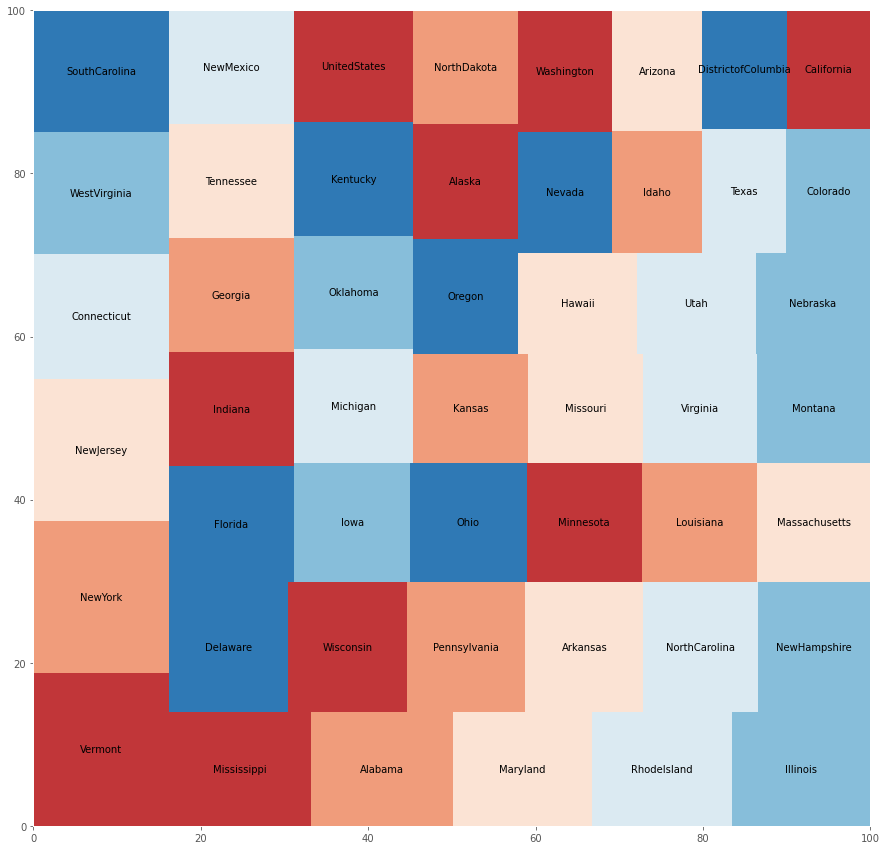

In [35]:
#Plotting a Treemap of DaysOnZillow_AllHomes data for all the states
plt.figure(figsize=(15,15))

#Remove NaN values and sort data in descending order
new_data = state_vise['DaysOnZillow_AllHomes'].dropna()
new_data = new_data.sort_values(ascending=False)

#Plotting Treemap
squarify.plot(sizes = new_data, label=new_data.index, color=sns.color_palette('RdBu'))

#Identify NaN values in the data
new_data = state_vise['DaysOnZillow_AllHomes']
new_data = new_data[new_data.isnull()]
new_data.reset_index().T

In [36]:
#This line of code creates a scatter plot using Plotly library to display the median sold price of all homes over time. 


data = [go.Scatter(x = months_data['Date'], y = months_data['MedianSoldPrice_AllHomes'], name = 'Sold Price of All Homes')]
layout = {'title': 'Median Sold Price' }

#The plot is then displayed using the py.iplot() function.
py.iplot({'data':data,'layout':layout})

In [37]:
# This code plots a line chart of the median rental price per square feet for all homes over time. 
# The x axis represents the date range and the y axis represents the median rental price. 
# The layout variable is a dictionary that sets the title of the plot and 
# allows for customization of the x-axis range and the range selector. 
# Finally, the py.iplot function is used to plot the chart.







data = [go.Scatter(x=months_data['Date'], y = months_data['MedianRentalPricePerSqft_AllHomes'], name ='Sold')]

layout = dict(
    title='Median Rental per square feet for all Homes',
    xaxis=dict(
        range=['2010-01-01','2017-09-01'],
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                #dict(step='all')
            ])
        ),
        rangeslider=dict(range=['2010-01-01','2017-09-01']),
        type='date'
    )
)
py.iplot({'data':data,
         'layout': layout})

,0,1
RegionName,UnitedStates,Vermont
MedianRentalPricePerSqft_AllHomes,NaN,NaN


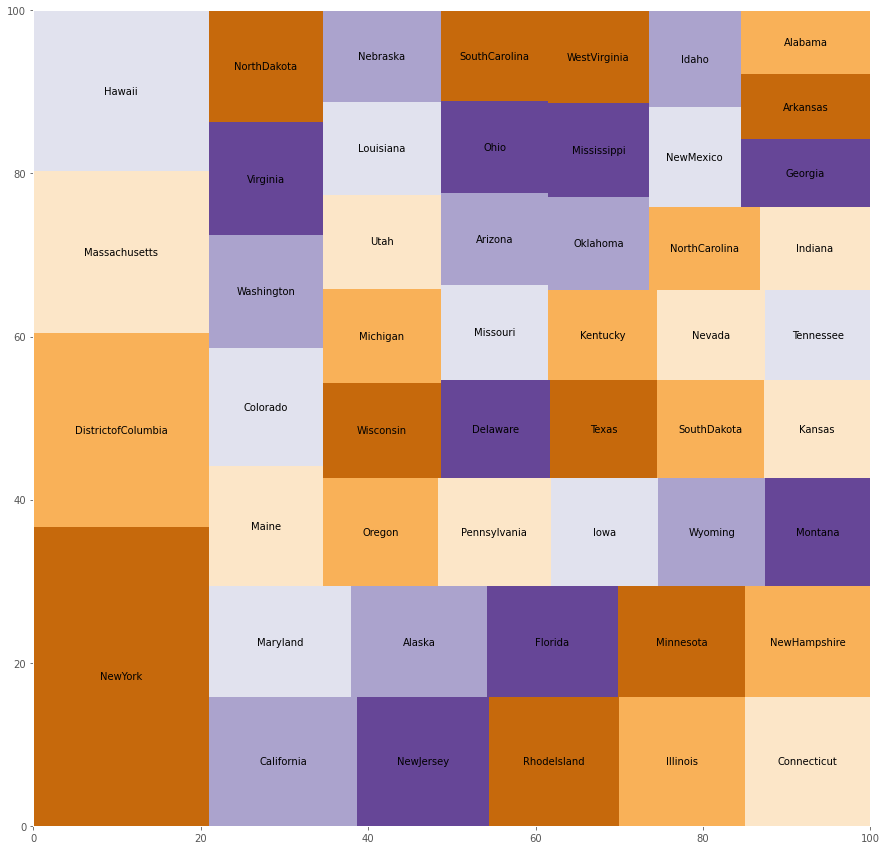

In [38]:
# the squarify library to create a treemap of the Median Rental Price per Square Feet for all homes in each state.
plt.figure(figsize=(15,15))

#It first drops the missing values and sorts the data in descending order.
new_data = state_vise['MedianRentalPricePerSqft_AllHomes'].dropna()
new_data = new_data.sort_values(ascending=False)

#The squarify.plot() function is then used to create the treemap with the specified color palette.
squarify.plot(sizes=new_data, label=new_data.index, color=sns.color_palette('PuOr'))
# Missing value
new_data = state_vise['MedianRentalPricePerSqft_AllHomes']
new_data = new_data[new_data.isnull()]
new_data.reset_index().T

In [39]:
# create a scatter plot of median listing price of all homes over time. 

data = [go.Scatter(x=months_data['Date'], y = months_data['MedianListingPrice_AllHomes'])]

layout = dict(
    title='Median listing price of all homes',
    xaxis=dict(
        range=['2010-01-01','2017-09-01'],
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                #dict(step='all')
            ])
        ),
        rangeslider=dict(range=['2010-01-01','2017-09-01']),
        type='date'
    )
)
py.iplot({'data':data,
         'layout': layout})


,0,1
RegionName,NorthDakota,UnitedStates
MedianListingPrice_AllHomes,NaN,NaN


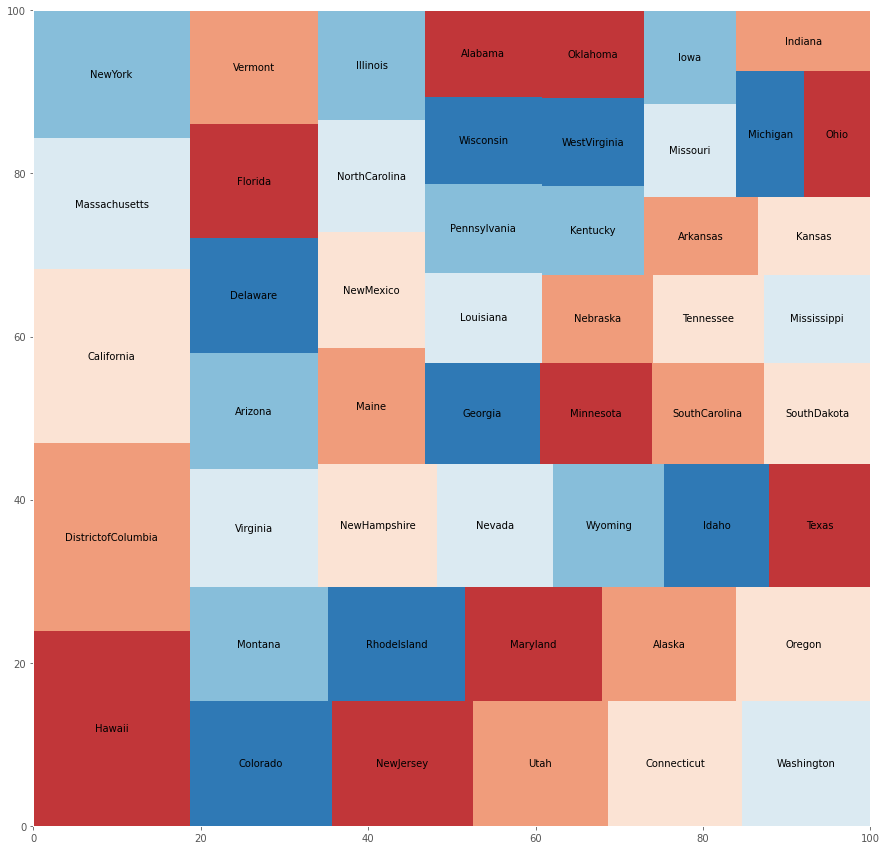

In [40]:
plt.figure(figsize=(15,15))
new_data = state_vise['MedianListingPrice_AllHomes'].dropna()
new_data = new_data.sort_values(ascending=False)
squarify.plot(sizes=new_data, label=new_data.index, color=sns.color_palette('RdBu'), )
# Missing value
new_data = state_vise['MedianListingPrice_AllHomes']
new_data = new_data[new_data.isnull()]
new_data.reset_index().T

In [41]:
data = [go.Scatter(x=months_data['Date'], y = months_data['PriceToRentRatio_AllHomes'])]
layout = dict(
    title='Price to rent ratio of all homes',
    xaxis=dict(
        range=['2010-10-01','2017-09-01'],
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                #dict(step='all')
            ])
        ),
        rangeslider=dict(range=['2010-10-01','2017-09-01']),
        type='date'
    )
)
py.iplot({'data':data,
         'layout': layout})


,0,1,2
RegionName,Louisiana,UnitedStates,Vermont
PriceToRentRatio_AllHomes,NaN,NaN,NaN


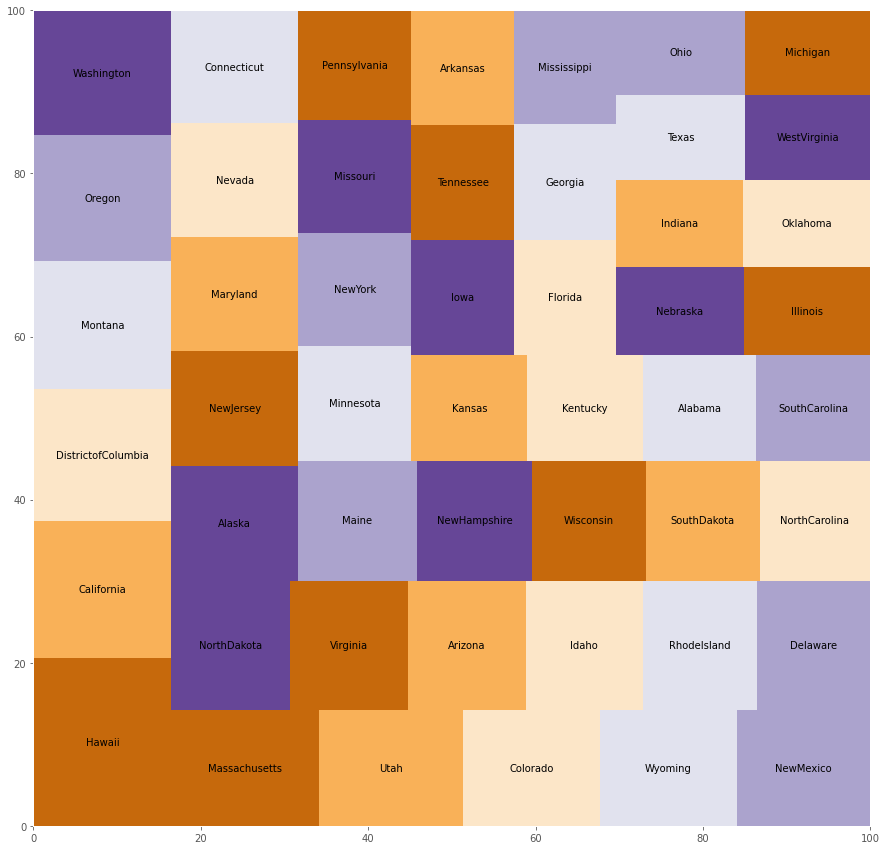

In [42]:
plt.figure(figsize=(15,15))
new_data = state_vise['PriceToRentRatio_AllHomes'].dropna()
new_data = new_data.sort_values(ascending=False)
squarify.plot(sizes=new_data, label=new_data.index, color=sns.color_palette('PuOr'), )
# Missing value
new_data = state_vise['PriceToRentRatio_AllHomes']
new_data = new_data[new_data.isnull()]
new_data.reset_index().T

In [43]:
#Home value by year
data = [go.Scatter(x = months_data['Date'], y = months_data['PctOfHomesDecreasingInValues_AllHomes'], name ='Decreasing'),
        go.Scatter(x = months_data['Date'], y = months_data['PctOfHomesIncreasingInValues_AllHomes'], name ='Increasing'),
       ]
layout = dict(
    title='Percentage Increse vs Decressing Value Of Homes',
    xaxis=dict(
        range=['1997-02-01','2017-09-01'],
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                #dict(step='all')
            ])
        ),
        rangeslider=dict(range=['1997-02-01','2017-09-01']),
        type='date'
    )
)
py.iplot({'data':data,
         'layout': layout})


In [44]:
#Percentage Gain or Loss of Sold Home
#plot showing the percentage increase versus decreasing value of homes over time

data = [go.Scatter(x = months_data['Date'], y = months_data['PctOfHomesSellingForGain_AllHomes'], name ='Selling Gain'),
        go.Scatter(x = months_data['Date'], y = months_data['PctOfHomesSellingForLoss_AllHomes'], name ='Selling Loss'),
       ]
layout = dict(
    title='Percentage Gain vs Loss Sold of Home',
    xaxis=dict(
        range=['2001-01-01','2017-07-01'],
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                #dict(step='all')
            ])
        ),
        rangeslider=dict(range=['2001-01-01','2017-07-01']),
        type='date'
    )
)
py.iplot({'data':data,
         'layout': layout})

In [45]:
#Percentage Gain or Loss of Sold Home
#a line plot of the ratio of homes sold as foreclosures for all homes over time

data = [go.Scatter(x = months_data['Date'], y = months_data['MedianListingPricePerSqft_1Bedroom'], name ='1 Bedroom'),
        go.Scatter(x = months_data['Date'], y = months_data['MedianListingPricePerSqft_2Bedroom'], name ='2 Bedroom'),
        go.Scatter(x = months_data['Date'], y = months_data['MedianListingPricePerSqft_3Bedroom'], name ='3 Bedroom'),
        go.Scatter(x = months_data['Date'], y = months_data['MedianListingPricePerSqft_4Bedroom'], name ='4 Bedroom'),
        go.Scatter(x = months_data['Date'], y = months_data['MedianListingPricePerSqft_5BedroomOrMore'], name ='5 or more Bedroom'),
        go.Scatter(x = months_data['Date'], y = months_data['MedianListingPricePerSqft_CondoCoop'], name ='Condo Coop'),
        go.Scatter(x = months_data['Date'], y = months_data['MedianListingPricePerSqft_DuplexTriplex'], name ='Duplex Triplex'),
        go.Scatter(x = months_data['Date'], y = months_data['MedianListingPricePerSqft_SingleFamilyResidence'], name ='Single Family'),
       ]
layout = dict(
    title='Median Listing Price$/sqft',
    xaxis=dict(
        range=['2010-02-01','2017-07-01'],
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                #dict(step='all')
            ])
        ),
        rangeslider=dict(range=['2010-02-01','2017-07-01']),
        type='date'
    )
)
py.iplot({'data':data,
         'layout': layout})


In [46]:
#Zillow rent index
# a line plot of the Zillow Rent Index for all homes over time. 
# The x-axis will show the date range from January 2010 to October 2017, 
# and the y-axis will show the Zillow Rent Index value.

data = [go.Scatter(x=months_data['Date'], y = months_data['ZRI_AllHomes'])]
layout = dict(
    title='Zillow rent index of all homes',
    xaxis=dict(
        range=['2010-01-01','2017-10-01'],
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                #dict(step='all')
            ])
        ),
        rangeslider=dict(range=['2010-01-01','2017-10-01']),
        type='date'
    )
)
py.iplot({'data':data,
         'layout': layout})


In [47]:

# a line chart of the rental price of homes per square foot for different types of properties 
# such as 1-bedroom, 2-bedroom, 3-bedroom, 
# and so on, using data from the variable months_data.


data = [go.Scatter(x = months_data['Date'], y = months_data['MedianRentalPricePerSqft_1Bedroom'], name ='1 Bedroom'),
        go.Scatter(x = months_data['Date'], y = months_data['MedianRentalPricePerSqft_2Bedroom'], name ='2 Bedroom'),
        go.Scatter(x = months_data['Date'], y = months_data['MedianRentalPricePerSqft_3Bedroom'], name ='3 Bedroom'),
        go.Scatter(x = months_data['Date'], y = months_data['MedianRentalPricePerSqft_4Bedroom'], name ='4 Bedroom'),
        go.Scatter(x = months_data['Date'], y = months_data['MedianRentalPricePerSqft_5BedroomOrMore'], name ='5 or more Bedroom'),
        go.Scatter(x = months_data['Date'], y = months_data['MedianRentalPricePerSqft_CondoCoop'], name ='Condo Coop'),
        go.Scatter(x = months_data['Date'], y = months_data['MedianRentalPricePerSqft_DuplexTriplex'], name ='Duplex Triplex'),
        go.Scatter(x = months_data['Date'], y = months_data['MedianRentalPricePerSqft_SingleFamilyResidence'], name ='Single Family'),
        go.Scatter(x = months_data['Date'], y = months_data['MedianRentalPricePerSqft_Studio'], name ='Studio'),
       ]
layout = dict(
    title='Rental price of homes per square foot',
    xaxis=dict(
        range=['2010-01-01','2017-10-01'],
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                #dict(step='all')
            ])
        ),
        rangeslider=dict(range=['2010-01-01','2017-10-01']),
        type='date'
    )
)
py.iplot({'data':data,
         'layout': layout})


In [48]:
#a plot of the median value of all homes per square foot over time using Plotly.
#The plot also includes a range selector that allows the user to zoom in on specific time periods, 
# and a rangeslider that allows the user to adjust the visible time range.

data = [go.Scatter(x=months_data['Date'], y = months_data['ZHVIPerSqft_AllHomes'])]
layout = dict(
    title='Median of the value of all homes per square foot',
    xaxis=dict(
        range=['1996-10-01','2017-12-01'],
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                #dict(step='all')
            ])
        ),
        rangeslider=dict(range=['1996-10-01','2017-12-01']),
        type='date'
    )
)
py.iplot({'data':data,
         'layout': layout})


## LSTM

In [49]:
#imports necessary modules for building a deep learning model for time series forecasting.

#imports several performance metrics such as 
#mean squared error, accuracy score, f1 score, and mean absolute error 
#that can be used to evaluate the performance of the model.
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, mean_absolute_error

#imports MinMaxScaler which is used to scale the data to a specific range. 
#Scaling the data to a specific range helps to reduce the impact of outliers and improve the convergence of the model.
from sklearn.preprocessing import MinMaxScaler

#imports the Sequential class which is used to build a sequential model. 
#Sequential model is a linear stack of layers that can be used to build deep learning models.
from keras.models import Sequential

# imports LSTM, Dense, and Dropout layers that can be used to build the deep learning model. 
# LSTM layer is a type of recurrent neural network (RNN) layer that can learn long-term dependencies in the time series data. 
# Dense layer is a fully connected layer that can learn nonlinear relationships in the data. 
# Dropout layer is used to prevent overfitting by randomly dropping out some of the neurons during training.
from keras.layers import LSTM, Dense, Dropout

In [50]:
#sets the index of the state_data DataFrame to be the Date column
#useful for data analysis tasks that require time-series data, 
#as setting the index to the date column can make it easier to manipulate and plot the data over time.
state_data = state_data.set_index('Date')
use_data = state_data['MedianSoldPrice_AllHomes']
use_data.head()

Date
1996-04-30     86725.0
1996-04-30    102300.0
1996-04-30     68550.0
1996-04-30    155725.0
1996-04-30    127845.0
Name: MedianSoldPrice_AllHomes, dtype: float64

<AxesSubplot:xlabel='Date'>

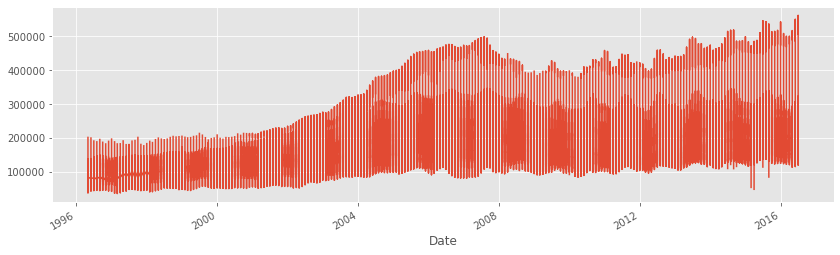

In [51]:
#the median sold price of all homes in the given state over time
plt.figure(figsize=(14,4))
use_data.plot()

<AxesSubplot:xlabel='Date'>

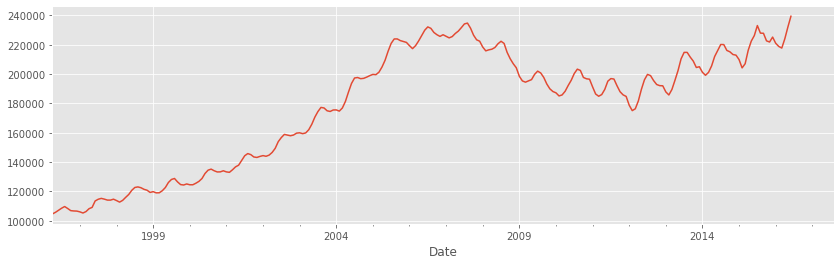

In [52]:
# Resample data by monthly
#This code is resampling the use_data time series data to monthly frequency by taking the mean of each month.
plt.figure(figsize=(14,4))
use_data = use_data.resample('M').mean()
use_data.plot()

In [53]:
#filling nan values
#ffill() is a method used to forward fill the missing values in a pandas dataframe or series
# use_data may have some missing values that are filled with the last known value before resampling it monthly.
# The ffill() method is used to fill any remaining missing values with the last known value in the dataset. 
# This is a common technique used in time series analysis to ensure that there are no missing values in the data


use_data = use_data.ffill()

In [54]:
# Normalize the data
#normalize the use_data values between 0 and 1.
scaler = MinMaxScaler(feature_range=(0, 1))
use_data_normalized = scaler.fit_transform(use_data.values.reshape(-1, 1))

In [55]:
# Prepare training and test sets
#splits the normalized data into training and testing sets
train_size = int(len(use_data_normalized) * 0.8)
train, test = use_data_normalized[:train_size], use_data_normalized[train_size:]

In [56]:
# Convert time series data into supervised learning dataset

#function creates a dataset that can be used for time series forecasting
#It takes two arguments, dataset which is a numpy array containing the time series data, 
#and look_back which is an integer indicating the number of time steps to look back when creating input data.

#function loops through the entire dataset and creates input/output pairs. 
#For each time step i in the dataset, it creates an input sequence by taking 
#the previous look_back time steps, and an output value as the next time step.

def createDataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back, 0])
        y.append(dataset[i+look_back, 0])
    return np.array(X), np.array(y)

In [57]:
# previous is set to 12, so the createDataset function will create input/output pairs for the model 
# where the input consists of the previous 12 time steps, and the output is the next time step.
#x_train is a 2D numpy array of shape (num_samples, previous), where num_samples is the number of input/output pairs

previous = 12  # Number of previous time steps to use as input
x_train, y_train = createDataset(train, previous)
x_test, y_test = createDataset(test, previous)


In [58]:
# Reshape the input data into the format expected by LSTM (samples, time steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [59]:
# Build the LSTM model
#sequential model using Keras with two LSTM layers followed by a dropout layer and a dense layer. 
#The optimizer used is Adam, and the loss function is binary cross-entropy with accuracy as the evaluation metric.

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(previous, 1)))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
193/193 - 11s - loss: 0.5636 - accuracy: 0.0000e+00 - 11s/epoch - 57ms/step
Epoch 2/100
193/193 - 3s - loss: 0.5296 - accuracy: 0.0000e+00 - 3s/epoch - 17ms/step
Epoch 3/100
193/193 - 3s - loss: 0.5323 - accuracy: 0.0000e+00 - 3s/epoch - 17ms/step
Epoch 4/100
193/193 - 3s - loss: 0.5308 - accuracy: 0.0000e+00 - 3s/epoch - 16ms/step
Epoch 5/100
193/193 - 3s - loss: 0.5295 - accuracy: 0.0000e+00 - 3s/epoch - 16ms/step
Epoch 6/100
193/193 - 2s - loss: 0.5298 - accuracy: 0.0000e+00 - 2s/epoch - 12ms/step
Epoch 7/100
193/193 - 2s - loss: 0.5292 - accuracy: 0.0000e+00 - 2s/epoch - 13ms/step
Epoch 8/100
193/193 - 3s - loss: 0.5292 - accuracy: 0.0000e+00 - 3s/epoch - 15ms/step
Epoch 9/100
193/193 - 3s - loss: 0.5282 - accuracy: 0.0000e+00 - 3s/epoch - 17ms/step
Epoch 10/100
193/193 - 2s - loss: 0.5287 - accuracy: 0.0000e+00 - 2s/epoch - 13ms/step
Epoch 11/100
193/193 - 3s - loss: 0.5280 - accuracy: 0.0000e+00 - 3s/epoch - 15ms/step
Epoch 12/100
193/193 - 3s - loss: 0.5248 - accurac

Epoch 96/100
193/193 - 3s - loss: 0.5165 - accuracy: 0.0000e+00 - 3s/epoch - 16ms/step
Epoch 97/100
193/193 - 3s - loss: 0.5165 - accuracy: 0.0000e+00 - 3s/epoch - 17ms/step
Epoch 98/100
193/193 - 3s - loss: 0.5171 - accuracy: 0.0000e+00 - 3s/epoch - 17ms/step
Epoch 99/100
193/193 - 3s - loss: 0.5165 - accuracy: 0.0000e+00 - 3s/epoch - 15ms/step
Epoch 100/100
193/193 - 3s - loss: 0.5162 - accuracy: 0.0000e+00 - 3s/epoch - 15ms/step


In [61]:
# Make predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

2/2 [==============================] - 0s 9ms/step


In [62]:
# Invert predictions back to original scale
#scale the predicted values back to their original scale done by inverse transform of minmaxscaler
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [63]:
# Calculate root mean squared error
#average deviation of the predicted values from the actual values in the same units as the target variable
#verage difference between the actual median home prices in the training set and the predicted median home prices 
#by the model is 2223.26 USD

train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
print('Train RMSE: %.2f' % (train_score))

Train RMSE: 2010.38


In [64]:
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print('Test RMSE: %.2f' % (test_score))

Test RMSE: 4808.11


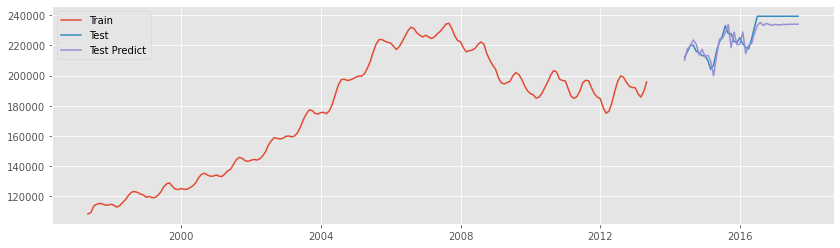

In [65]:
# Plot the results
#visualize how well the model's predictions match the actual median home prices.
plt.figure(figsize=(14, 4))
plt.plot(use_data.index[previous:len(train_predict) + previous], y_train[0], label='Train')
plt.plot(use_data.index[-len(y_test[0]):], y_test[0], label='Test')
plt.plot(use_data.index[-len(test_predict[:, 0]):], test_predict[:, 0], label='Test Predict')
plt.legend()
plt.show()

In [66]:
# Calculate accuracy and F1 score
#creates binary classification labels for the target variable and the predicted values, 
#separately, for the training and testing data.

train_y_class = np.where(y_train[0][1:] > y_train[0][:-1], 1, 0)
train_predict_class = np.where(train_predict[:, 0][1:] > train_predict[:, 0][:-1], 1, 0)
test_y_class = np.where(y_test[0][1:] > y_test[0][:-1], 1, 0)
test_predict_class = np.where(test_predict[:, 0][1:] > test_predict[:, 0][:-1], 1, 0)

In [67]:
train_accuracy = accuracy_score(train_y_class, train_predict_class)
train_f1 = f1_score(train_y_class, train_predict_class)

test_accuracy = accuracy_score(test_y_class, test_predict_class)
test_f1 = f1_score(test_y_class, test_predict_class)

mse_test = mean_squared_error(test_y_class, test_predict_class)
mae_test = mean_absolute_error(test_y_class, test_predict_class)

mse_train = mean_squared_error(train_y_class, train_predict_class)
mae_train = mean_absolute_error(train_y_class, train_predict_class)


In [68]:
#F1 score may not be the most appropriate evaluation metrics for regression problems, 
#as they are designed for classification problems
print('Train Accuracy: %.2f' % (train_accuracy))
print('Train F1 Score: %.2f' % (train_f1))
print('Test Accuracy: %.2f' % (test_accuracy))
print('Test F1 Score: %.2f' % (test_f1))
print('MSE Train: ', mse_train)
print('MAE Train: ', mae_train)
print('MSE Test: ', mse_test)
print('MAE Test: ', mae_test)

Train Accuracy: 0.78
Train F1 Score: 0.81
Test Accuracy: 0.62
Test F1 Score: 0.57
MSE Train:  0.21875
MAE Train:  0.21875
MSE Test:  0.38461538461538464
MAE Test:  0.38461538461538464


## ARIMA

In [69]:
#useful time series analysis tools from the statsmodels and pandas
#augmented Dickey-Fuller test for stationarity of a time series
#acf computes the autocorrelation function of a time series

from statsmodels.tsa.stattools import adfuller,acf,pacf
#seasonal_decompose decomposes a time series into its seasonal, trend and residual components.
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

Perfom Dickey fuller test
Test Statistic                  -2.113292
p-value                          0.239204
#Lags Used                      12.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


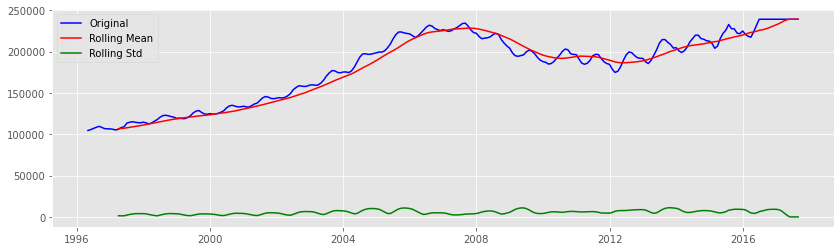

In [70]:
# Check stationary
# function takes a time series as input and performs the following operations:

# Computes rolling statistics (rolling mean and rolling standard deviation) with a window size of 12
# Plots the original time series along with the rolling mean and rolling standard deviation
# Conducts the Dickey-Fuller test for stationarity and prints the test statistics and p-values
# The function aims to check the stationarity of the time series.


def stationary_check(timeseries):
    # rolling statics
    mean_roll = timeseries.rolling(window=12).mean()
    std_roll = timeseries.rolling(window=12).std()

    # plot rolling statistics
    plt.figure(figsize=(14, 4))
    plt.plot(use_data, color='b', label='Original')
    plt.plot(mean_roll, color='r', label='Rolling Mean')
    plt.plot(std_roll, color='g', label='Rolling Std')
    plt.legend(loc='best')

    # Dickey fuller test
    print('Perfom Dickey fuller test')
    df_test = adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' % key] = value
    print(df_output)
stationary_check(use_data)

In [71]:
# In the context of the Augmented Dickey-Fuller (ADF) test, the null hypothesis is that the time series has a unit root,
# which means it is non-stationary and has a trend. 
# If the p-value of the ADF test is less than the significance level (e.g., 0.05), 
# we reject the null hypothesis and conclude that the time series is stationary, 
# indicating that it does not have a trend.

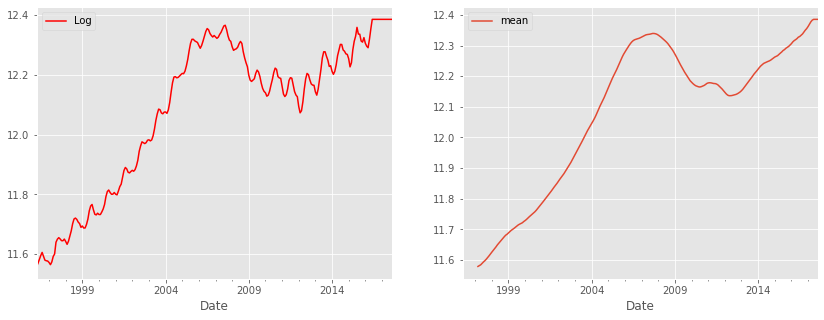

In [72]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax1, ax2 = ax.flatten()
use_data_log = np.log(use_data)
#first subplot (ax1) plots the natural logarithm of the time series data
use_data_log.plot(ax=ax1, label ='Log', color ='r')
ax1.legend(loc = 'best')
#econd subplot (ax2) plots the rolling mean of the logarithmic transformed data with a window size of 12
use_data_ma = use_data_log.rolling(12).mean()
use_data_ma.plot(ax = ax2, label ='mean')
ax2.legend(loc = 'best')

<AxesSubplot:xlabel='Date'>

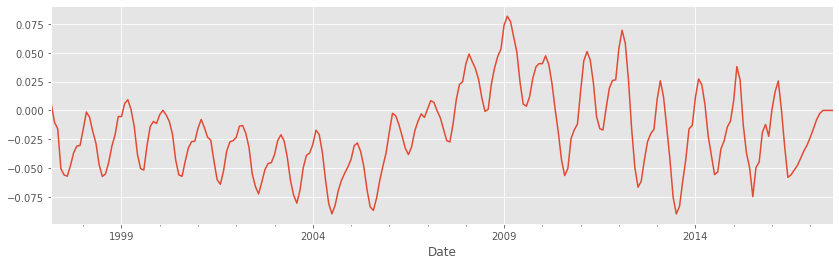

In [73]:
# plot of the difference between the moving average and the log-transformed data. 
# The difference data is obtained by subtracting the moving average from the log-transformed data

plt.figure(figsize=(14,4))
use_data_dif = use_data_ma - use_data_log
use_data_dif = use_data_dif.dropna() # fill na
use_data_dif.plot()

Perfom Dickey fuller test
Test Statistic                  -2.613145
p-value                          0.090311
#Lags Used                      12.000000
Number of Observations Used    233.000000
Critical Value (1%)             -3.458731
Critical Value (5%)             -2.874026
Critical Value (10%)            -2.573424
dtype: float64


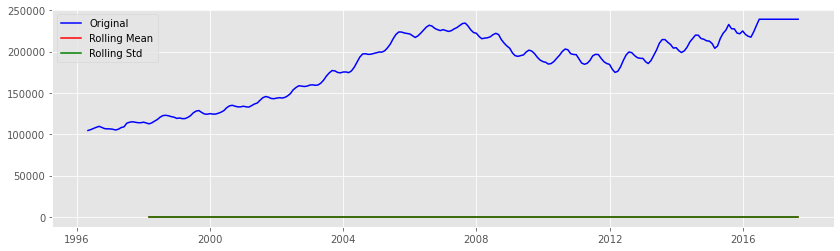

In [74]:
stationary_check(use_data_dif)

<AxesSubplot:xlabel='Date'>

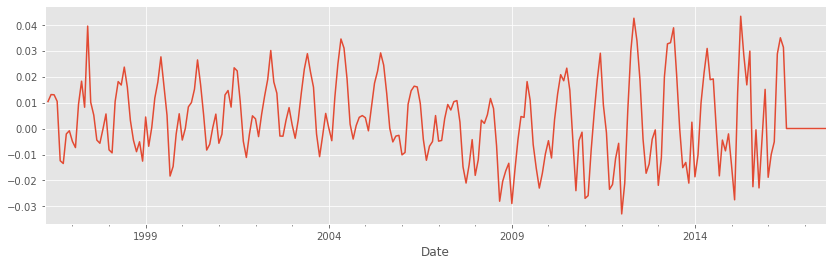

In [75]:
#Eliminating trend and seasonality
#subtracting the time series shifted by one time step from the original time series to obtain the difference
usedata_log_dif = use_data_log - use_data_log.shift()
plt.figure(figsize=(14,4))
usedata_log_dif.plot()

Perfom Dickey fuller test
Test Statistic                  -1.614597
p-value                          0.475563
#Lags Used                      11.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


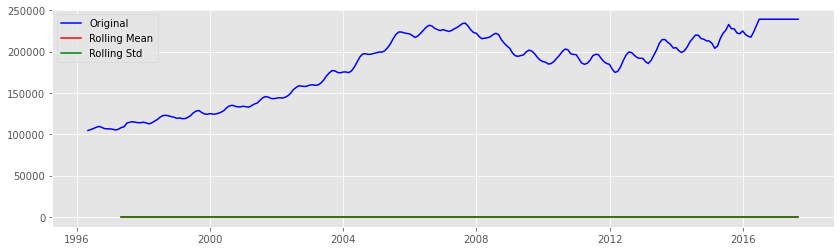

In [76]:
usedata_log_dif.dropna(inplace = True)
stationary_check(usedata_log_dif)

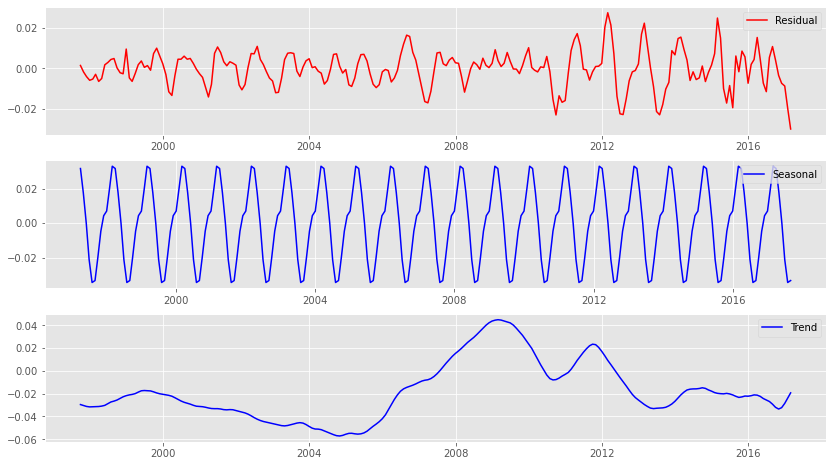

In [77]:
# Decomposing
#decompose the time series into its constituent parts: trend, seasonality, and residual.
decomp = seasonal_decompose(use_data_dif)
fig,ax = plt.subplots(3,1,figsize=(14,8))
ax
ax[0].plot(decomp.resid, label ='Residual', color ='r')
ax[0].legend(loc= 'best')
ax[1].plot(decomp.seasonal, label ='Seasonal', color ='b')
ax[1].legend(loc = 'best')
ax[2].plot(decomp.trend, label ='Trend', color ='b')
ax[2].legend(loc = 'best')

Perfom Dickey fuller test
Test Statistic                -8.836579e+00
p-value                        1.712689e-14
#Lags Used                     5.000000e+00
Number of Observations Used    2.280000e+02
Critical Value (1%)           -3.459361e+00
Critical Value (5%)           -2.874302e+00
Critical Value (10%)          -2.573571e+00
dtype: float64


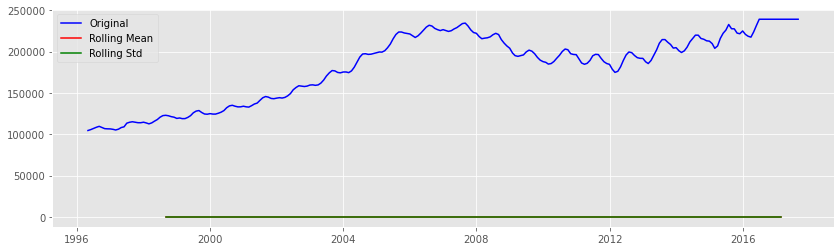

In [78]:
stationary_check(decomp.resid.dropna())

In [79]:
#now residuals are stationary and suitable for further analysis.

In [80]:
#forecasting time series using ARIMA

#computes the autocorrelation function (ACF) and partial autocorrelation function (PACF) of the use_data_dif 
#time series using the acf() and pacf() functions from the statsmodels library


# ACF
acf_lag = acf(use_data_dif, nlags=20)
#PACF
pacf_lag = pacf(use_data_dif, nlags=20, method='ols')

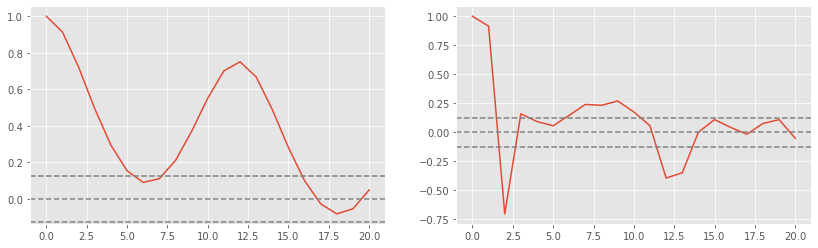

In [81]:
#ACF plot, the horizontal dashed lines represent the confidence intervals. 
#Any correlation outside these lines is considered significant. 
#Similarly, in the PACF plot, the dashed lines are the confidence intervals. 
#We can use these plots to determine the parameters of our ARIMA model.


fig,ax = plt.subplots(1,2, figsize=(14,4))
ax1, ax2 = ax.flatten()
ax1.plot(acf_lag)
ax1.axhline(y=0,linestyle='--',color= 'gray')
ax1.axhline(y= - 1.96/np.sqrt(len(use_data_dif)), linestyle='--', color='gray')
ax1.axhline(y= 1.96/np.sqrt(len(use_data_dif)), linestyle='--', color='gray')

ax2.plot(pacf_lag, )
ax2.axhline(y=0,linestyle = '--', color = 'gray')
ax2.axhline(y = -1.96/np.sqrt(len(use_data_dif)), linestyle ='--', color ='gray')
ax2.axhline(y = 1.96/np.sqrt(len(use_data_dif)), linestyle ='--', color ='gray')

The ARIMA model is built to forecast the differences between the logged data and its rolling mean. The order argument (5, 1, 1) specifies the number of autoregressive, differences, and moving average components to include in the model. The fitted model is then plotted against the differences between the logged data and its rolling mean, where the blue line represents the original data, and the red line represents the fitted values.

The summary() function provides the statistical summary of the ARIMA model, which includes the coefficients of the model, the standard errors, t-statistics, and p-values, as well as the Akaike Information Criterion (AIC), Schwarz Bayesian Criterion (BIC), and Hannan-Quinn Information Criterion (HQIC) values. These statistics can be used to evaluate the quality of the model and compare it to other models.

Note that we will need to apply an inverse transformation to the forecasted values to obtain predictions for the original data.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                  SARIMAX Results                                   
Dep. Variable:     MedianSoldPrice_AllHomes   No. Observations:                  246
Model:                       ARIMA(5, 1, 1)   Log Likelihood                 797.076
Date:                      Mon, 08 May 2023   AIC                          -1580.151
Time:                              23:05:41   BIC                          -1555.643
Sample:                          03-31-1997   HQIC                         -1570.282
                               - 08-31-2017                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3119      0.085     15.458      0.000       1.146       1.478
ar.L2         -0.7035      0.096     -7.314      0.000      -0.892      -0.515
ar.L

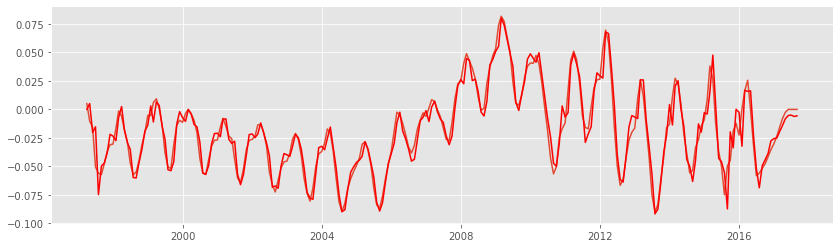

In [82]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(use_data_dif, order = (5, 1, 1))
model_fit = model.fit()
print(model_fit.summary())
plt.figure(figsize=(14,4))
plt.plot(use_data_dif)
plt.plot(model_fit.fittedvalues,color = 'r')

The SARIMAX model summary provides information about the model parameters, including the coefficients and their significance levels. The AIC and BIC scores can be used to compare the performance of different models. In this case, the AIC score is -1580.151 and the BIC score is -1555.643, which suggests that the model is a good fit for the data. The Ljung-Box test statistic tests the null hypothesis that the residuals are independently distributed. The p-value associated with this test is 0.24, which suggests that we cannot reject the null hypothesis. The Jarque-Bera (JB) test is a test of normality. The p-value associated with this test is 0.00, which indicates that we can reject the null hypothesis of normality. The heteroskedasticity (H) test tests the null hypothesis that the error variance is constant over time. The p-value associated with this test is 0.00, which suggests that we can reject the null hypothesis and conclude that there is heteroskedasticity in the data. Overall, the model appears to be a good fit for the data, although there may be some issues with non-normality and heteroskedasticity in the residuals.

In [83]:
#grid search to find the best ARIMA parameters for a given time series
#Evaluate arima model for (p,d,q)

# uses the ARIMA model to make predictions for the test set and calculates the mean squared error 
# between the predicted values and the actual values

def arima_evaluation(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    prev = [x for x in train]
    # make predictions
    predictions = []
    for t in range(len(test)):
        model = ARIMA(prev, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        prev.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return predictions, error

In [84]:
# p, d, q values. For each combination, it calls the arima_evaluation function to fit the ARIMA model and 
# calculate the out-of-sample mean squared error (MSE). 
# If the calculated MSE is better than the previous best MSE, it updates the best_score, 
# best_cfg and best_predict variable

def models_evaluate(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    best_predict = None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    predictions, mse = arima_evaluation(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                        best_predict = predictions
                    print('ARIMA%s MSE=%.3f' % (order, mse))
                except:
                    continue
    if best_cfg is not None:
        print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    else:
        print('No valid ARIMA configuration found.')
    return best_predict

# Evaluate parameter
pval = range(0, 5)
dval = range(0, 3)
qval = range(0, 5)
best_preds = models_evaluate(use_data, pval, dval, qval)

No valid ARIMA configuration found.


In [85]:
# Evaluate parameter
pval = range(0, 2)
dval = range(0, 2)
qval = range(0, 2)
best_preds = models_evaluate(use_data, pval, dval, qval)

No valid ARIMA configuration found.


expanding the range of values to explore or adjusting other parameters, such as the train-test split ratio.

## Prophet

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from matplotlib.ticker import MaxNLocator
#Prophet for time series forecasting
from prophet import Prophet
import squarify

In [87]:
#Load the data
data=pd.read_csv("DM_Project/State_time_series.csv", parse_dates=True)
data.Date=pd.to_datetime(data.Date)
data['year'] = data.Date.dt.year

In [88]:
#Get 5 costliest states
states = set(data[
                 ~data['ZHVI_AllHomes'].isnull() &
                 ~data['MedianSoldPrice_AllHomes'].isnull()
                 ]['RegionName'].values)

data_year = data[data['RegionName'].isin(states)].copy()
high_cost_states = data_year[['RegionName', 'ZHVI_AllHomes']].groupby('RegionName').max().sort_values(by=['ZHVI_AllHomes'], ascending=False)[:5].index.values.tolist()
data_year=data_year[data_year.RegionName.isin(high_cost_states)]
data_year.year = data_year.Date.dt.year

The increase in house median sale prices from 1996 to 2017 in the top 5 costliest US states: California, District of Columbia, Hawaii, Massachusetts, and New Jersey.

C:\Users\Checkout\AppData\Local\Temp\ipykernel_7428\3769097620.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



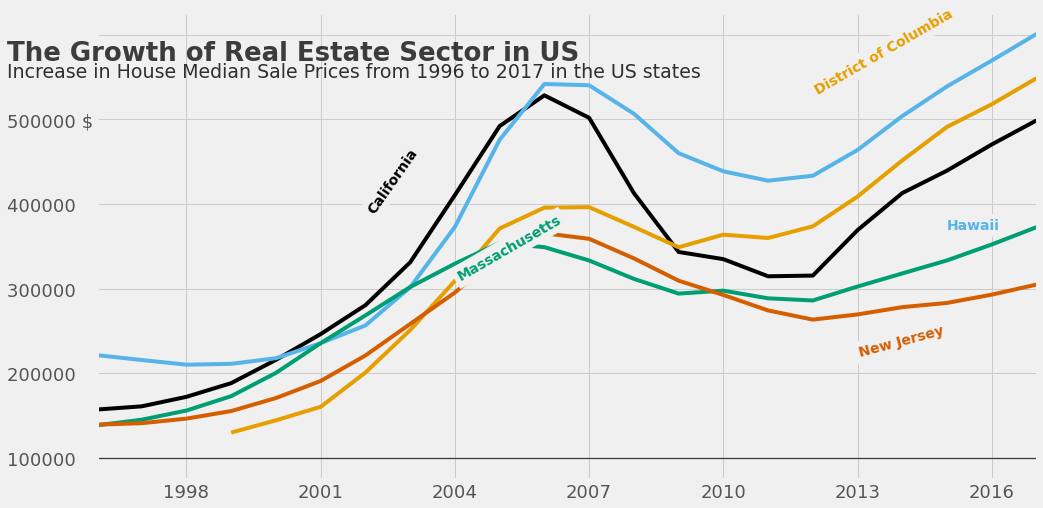

In [89]:
# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]


salesPricesData=data_year.groupby([data_year.year, data_year.RegionName])['ZHVI_AllHomes'].mean().dropna().reset_index(name='SoldPrice')
d1_graph=salesPricesData.pivot(index='year', columns='RegionName', values='SoldPrice').plot(figsize=(15, 8), color=colors, legend=False)
d1_graph.figure.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
d1_graph.tick_params(axis ='both', which ='major', labelsize = 18)
plt.xlabel("")
d1_graph.set_yticklabels(labels = [-10, '100000   ', '200000   ', '300000   ', '400000   ', '500000 $'])
# Generate a bolded horizontal line at y = 0
d1_graph.axhline(y = 100000, color ='black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
d1_graph.set_xlim(left = 1996, right = 2017)

# Adding a title and a subtitle
d1_graph.text(x = 1994, y = 570000, s ="The Growth of Real Estate Sector in US",
              fontsize = 26, weight = 'bold', alpha = .75)
d1_graph.text(x = 1994, y = 550000,
              s = 'Increase in House Median Sale Prices from 1996 to 2017 in the US states', fontsize = 19, alpha = 0.80)
# Add colored labels
d1_graph.text(x = 2002, y = 390000, s ='California', color = colors[0], weight ='bold', rotation = 55,
              backgroundcolor = '#f0f0f0')
d1_graph.text(x = 2012, y = 530000, s ='District of Columbia', color = colors[1], weight ='bold', rotation = 30,
              backgroundcolor = '#f0f0f0')
d1_graph.text(x = 2015, y = 370000, s ='Hawaii', color = colors[2], weight ='bold', rotation = 0,
              backgroundcolor = '#f0f0f0')
d1_graph.text(x = 2004, y = 310000, s ='Massachusetts', color = colors[3], weight ='bold', rotation = 30,
              backgroundcolor = '#f0f0f0')
d1_graph.text(x = 2013, y = 220000, s ='New Jersey', color = colors[4], weight ='bold', rotation = 15,
              backgroundcolor = '#f0f0f0');

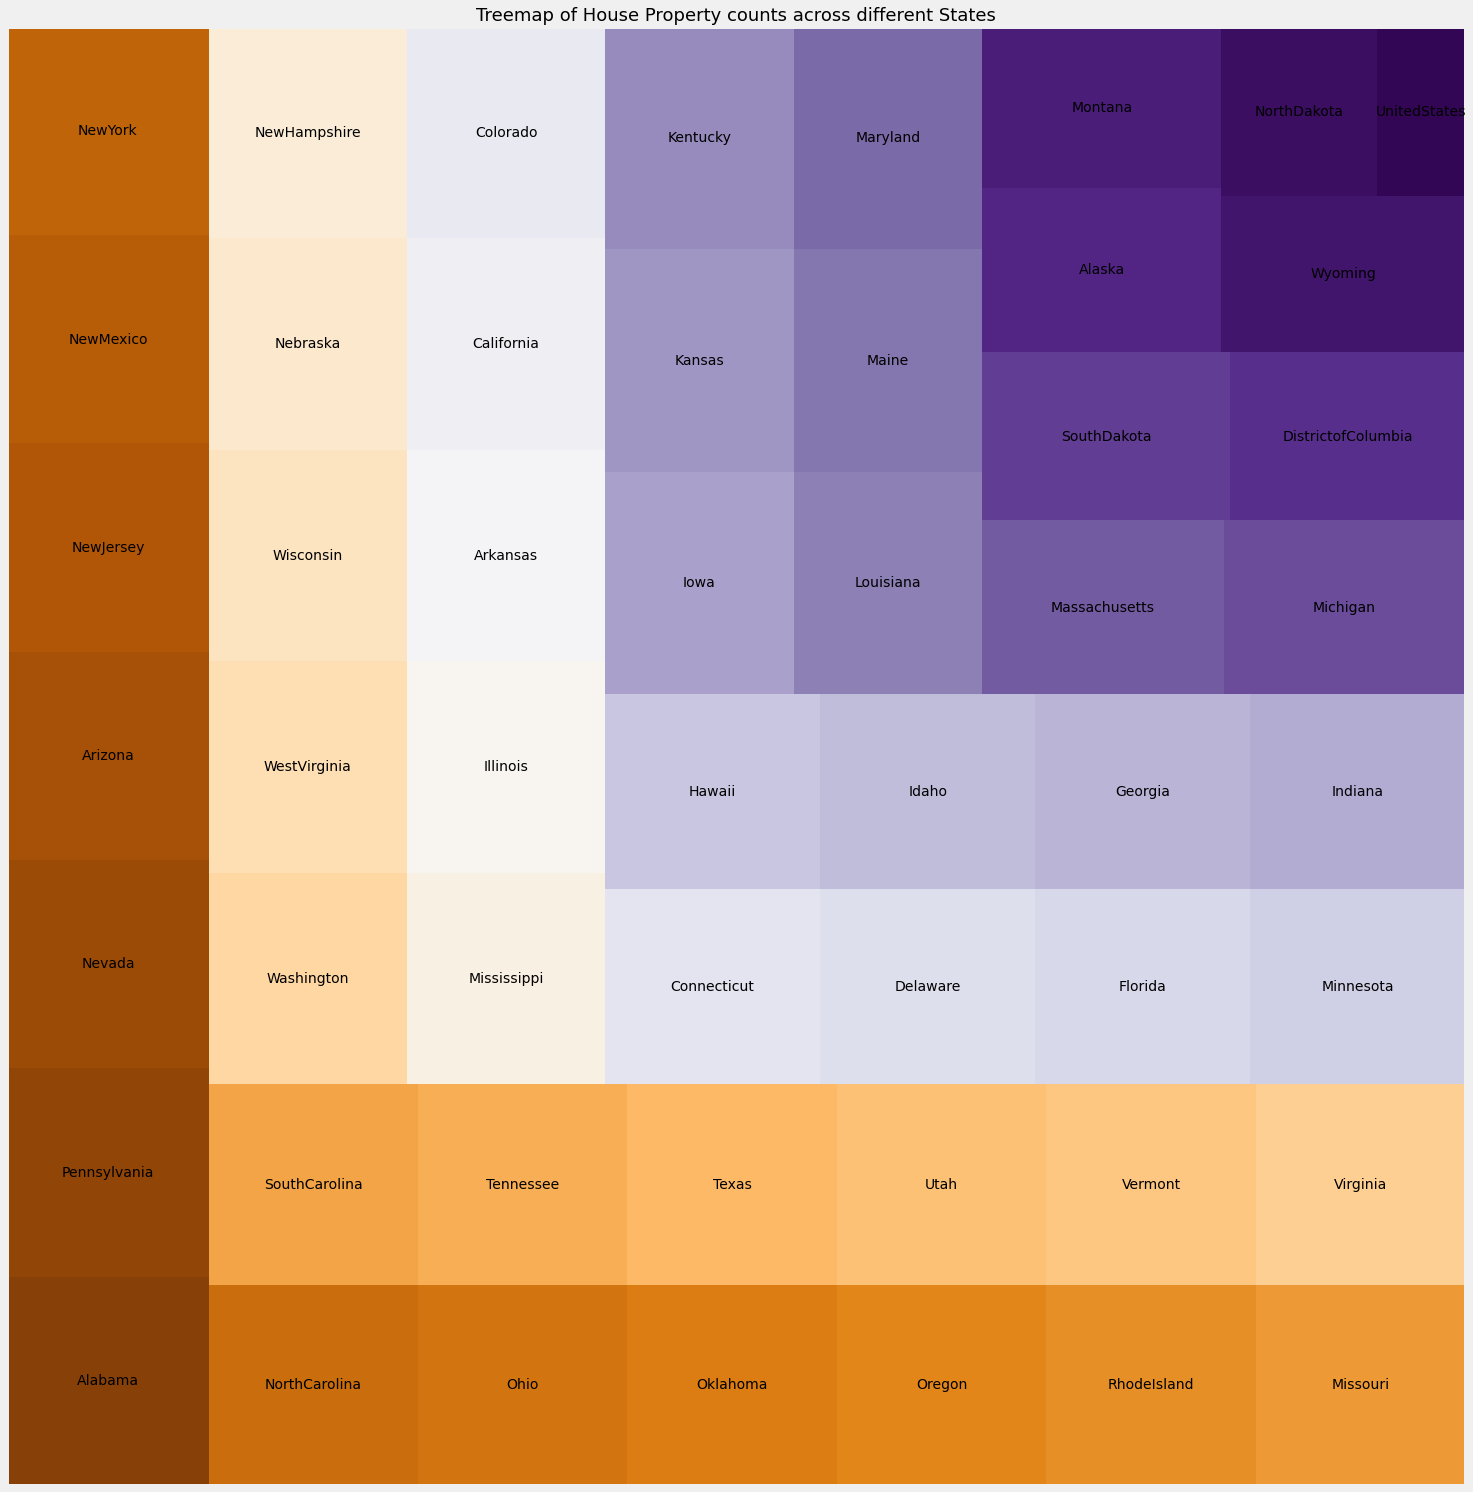

In [90]:
#size of the rectangles corresponds to the number of house properties, 
#and the color indicates the relative frequency of the states. 
#distribution of house property counts across different states

fig = plt.figure(figsize=(25, 21))
regions=data.RegionName.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=regions['RegionName'].values,label=regions.index,
              color=sns.color_palette('PuOr', 52), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of House Property counts across different States", fontsize=18)
plt.show();

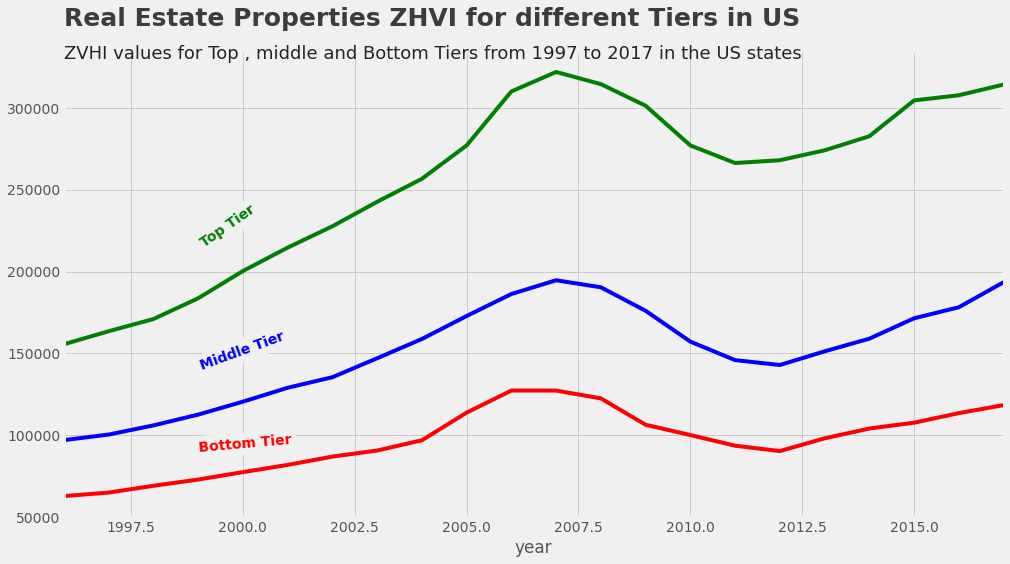

In [91]:
#line plot of the median Zillow Home Value Index (ZHVI) for different tiers of 
#properties (top, middle, and bottom) in the US from 1997 to 2017.

plt.figure(figsize=(15,8));
#plt.figure.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

data.groupby(data['year'])['ZHVI_TopTier'].median().plot(linewidth=4, c='g')
data.groupby(data['year'])['ZHVI_MiddleTier'].median().plot(linewidth=4, c='b')
data.groupby(data['year'])['ZHVI_BottomTier'].median().plot(linewidth=4, c='r')

# Generate a bolded horizontal line at y = 0
plt.axhline(y = 50000, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
plt.xlim(left = 1996, right = 2017)
# Adding a title and a subtitle
plt.text(x = 1996, y = 350000, s = "Real Estate Properties ZHVI for different Tiers in US",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 1996, y = 330000,
               s = 'ZVHI values for Top , middle and Bottom Tiers from 1997 to 2017 in the US states',
              fontsize = 18, alpha = .85);

plt.text(x = 1999, y = 215000, s = 'Top Tier', color = 'g', weight = 'bold', rotation = 35,
              backgroundcolor = '#f0f0f0')
plt.text(x = 1999, y = 140000, s = 'Middle Tier', color = 'b', weight = 'bold', rotation = 20,
              backgroundcolor = '#f0f0f0')
plt.text(x = 1999, y = 90000, s = 'Bottom Tier', color = 'r', weight = 'bold', rotation = 5,
              backgroundcolor = '#f0f0f0');

Relationship between the number of days a house has been listed on Zillow and its Zillow Home Value Index (ZHVI) for all homes.

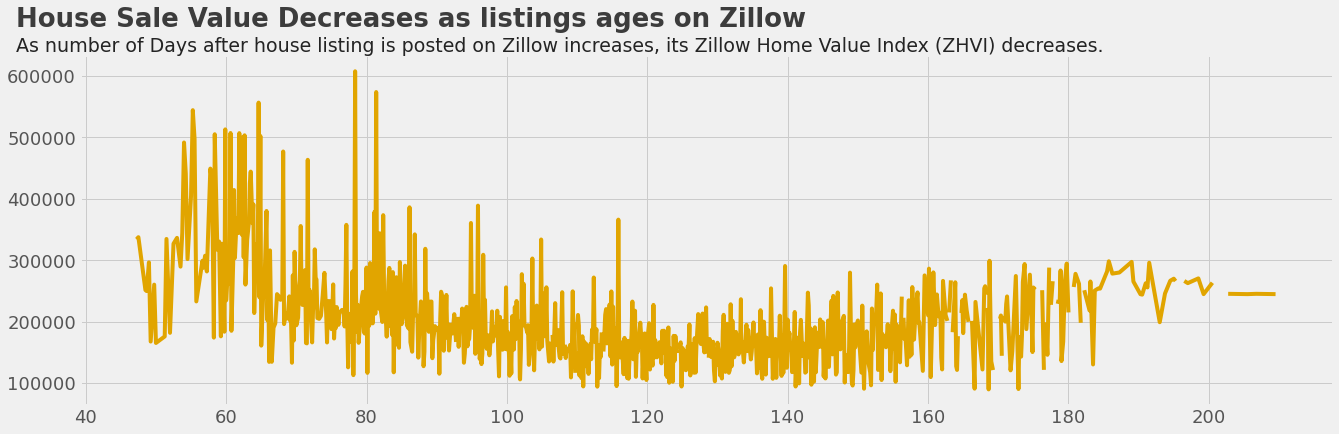

In [92]:
#ZHVI VS. Days On Zillow
#As number of Days after house listing is posted on Zillow increases, its Zillow Home Value Index (ZHVI) decreases
plt.figure(figsize=(20, 6))
mean_grp = data[['DaysOnZillow_AllHomes', 'ZHVI_AllHomes']].groupby(['DaysOnZillow_AllHomes'])['ZHVI_AllHomes'].mean()
plt.plot(mean_grp, color=[225 / 255, 165 / 255, 0])
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

# Adding a title and a subtitle
plt.text(x = 30, y = 680000, s = "House Sale Value Decreases as listings ages on Zillow",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = 30, y = 640000, s = 'As number of Days after house listing is posted on Zillow increases, its Zillow Home Value Index (ZHVI) decreases.',
              fontsize = 19, alpha = .85);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


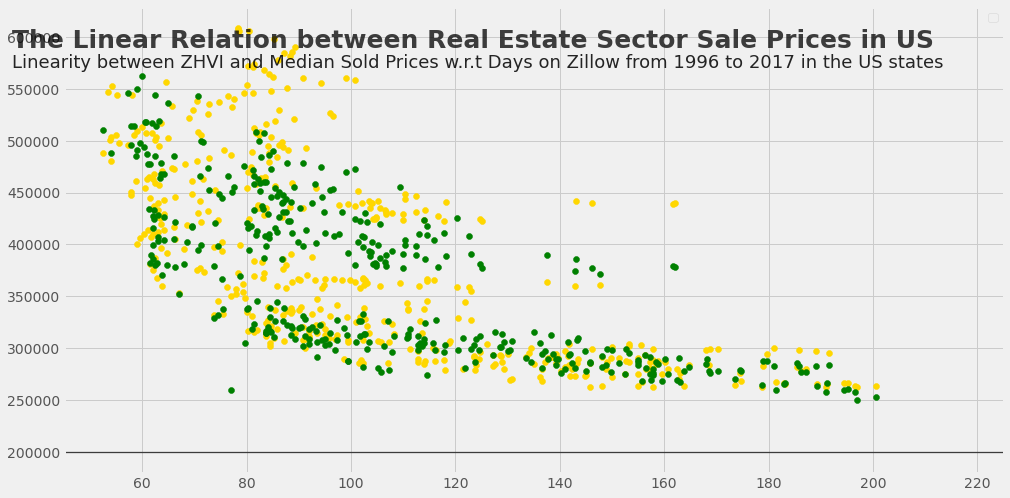

In [93]:
plt.figure(figsize=(15,8));

plt.scatter(data_year.DaysOnZillow_AllHomes, data_year.ZHVI_AllHomes, c="gold");
plt.scatter(data_year.DaysOnZillow_AllHomes, data_year.MedianSoldPrice_AllHomes, c="green");

# Generate a bolded horizontal line at y = 0
plt.axhline(y = 200000, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
plt.xlim(left = 45, right = 225)

plt.legend(fontsize=12,loc='best',frameon=1,fancybox=1)
# Adding a title and a subtitle
plt.text(x = 35, y = 590000, s = "The Linear Relation between Real Estate Sector Sale Prices in US",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 35, y = 570000,
               s = 'Linearity between ZHVI and Median Sold Prices w.r.t Days on Zillow from 1996 to 2017 in the US states',
              fontsize = 18, alpha = .85);

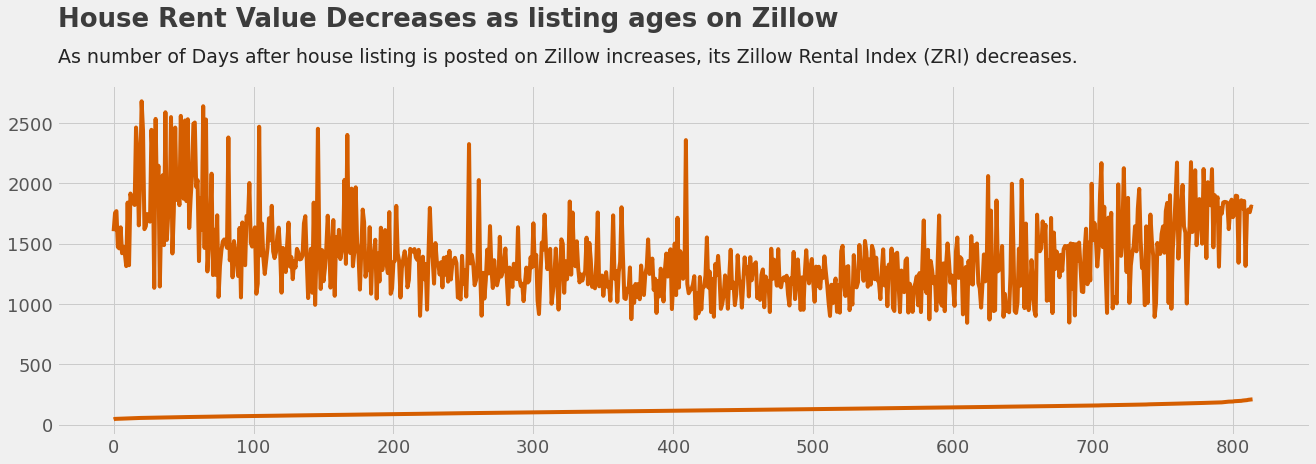

In [94]:
#ZRI VS. Days On Zillow

plt.figure(figsize=(20, 6))
mean_grp = data[['DaysOnZillow_AllHomes', 'ZRI_AllHomes']].groupby(['DaysOnZillow_AllHomes'])['ZRI_AllHomes'].mean().dropna().reset_index(name='ZRI_AllHomes_Mean')
mean_grp=mean_grp[(mean_grp.DaysOnZillow_AllHomes < 250)]
mean_grp=mean_grp[(mean_grp.ZRI_AllHomes_Mean > 500)]

plt.plot(mean_grp, color=[213 / 255, 94 / 255, 0])

plt.tick_params(axis = 'both', which = 'major', labelsize = 18)

# Adding a title and a subtitle
plt.text(x = -40, y = 3300, s = "House Rent Value Decreases as listing ages on Zillow",
               fontsize = 26, weight = 'bold', alpha = .75)
plt.text(x = -40, y = 3000,
               s = 'As number of Days after house listing is posted on Zillow increases, its Zillow Rental Index (ZRI) decreases.',
              fontsize = 19, alpha = .85);
plt.show();

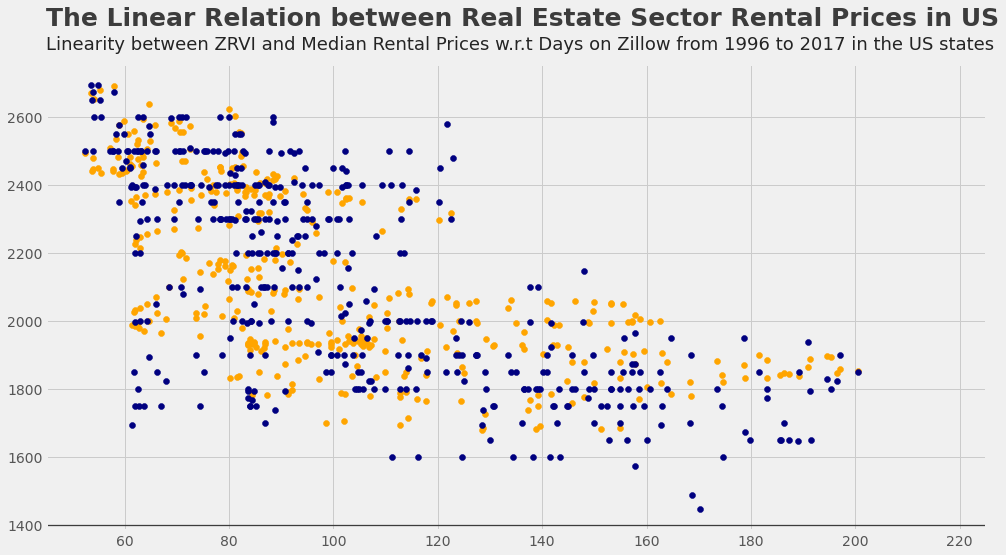

In [95]:
plt.figure(figsize=(15,8));

plt.scatter(data_year.DaysOnZillow_AllHomes, data_year.ZRI_AllHomes, c="orange")
plt.scatter(data_year.DaysOnZillow_AllHomes, data_year.MedianRentalPrice_AllHomes, c="navy");


# Generate a bolded horizontal line at y = 0
plt.axhline(y = 1400, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
plt.xlim(left = 45, right = 225)
# Adding a title and a subtitle
plt.text(x = 45, y = 2870, s = "The Linear Relation between Real Estate Sector Rental Prices in US",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 45, y = 2800,
               s = 'Linearity between ZRVI and Median Rental Prices w.r.t Days on Zillow from 1996 to 2017 in the US states',
              fontsize = 18, alpha = .85);

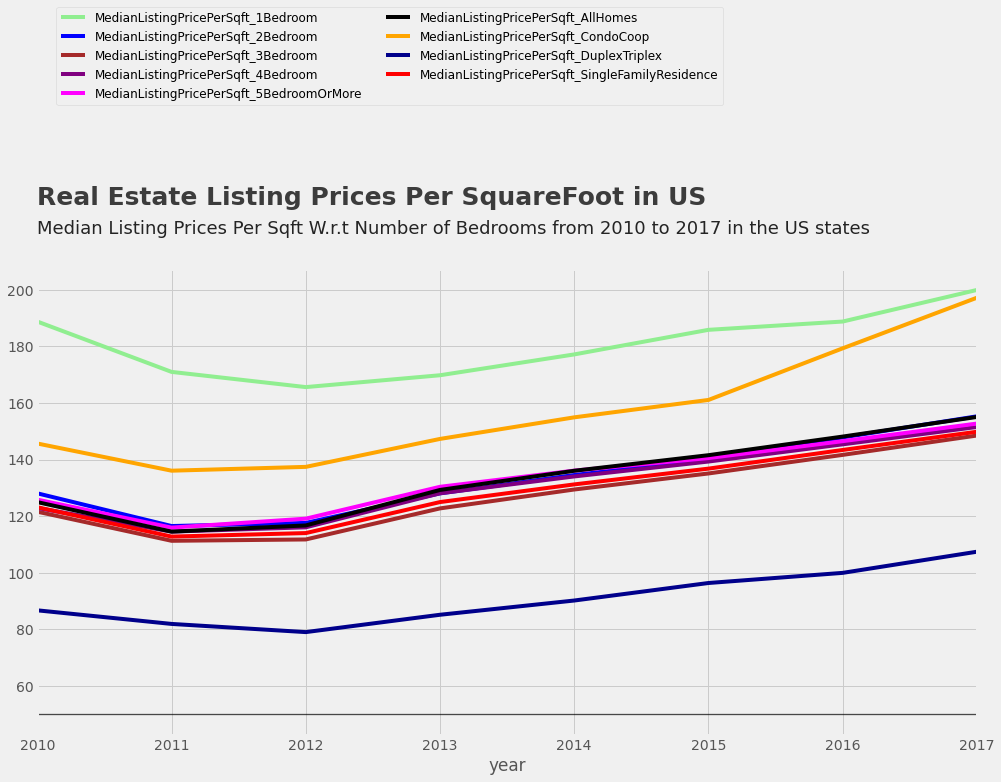

In [96]:
#line plot of median listing prices per square foot for different types of homes in the US from 2010 to 2017

plt.figure(figsize=(15,8));
data.groupby(data['year'])['MedianListingPricePerSqft_1Bedroom'].mean().dropna().plot(linewidth=4, c='lightgreen', legend=False)
data.groupby(data['year'])['MedianListingPricePerSqft_2Bedroom'].mean().dropna().plot(linewidth=4, c='b')
data.groupby(data['year'])['MedianListingPricePerSqft_3Bedroom'].mean().dropna().plot(linewidth=4, c='brown')
data.groupby(data['year'])['MedianListingPricePerSqft_4Bedroom'].mean().dropna().plot(linewidth=4, c='purple')
data.groupby(data['year'])['MedianListingPricePerSqft_5BedroomOrMore'].mean().dropna().plot(linewidth=4, c='magenta')
data.groupby(data['year'])['MedianListingPricePerSqft_AllHomes'].mean().dropna().plot(linewidth=4, c='black')
data.groupby(data['year'])['MedianListingPricePerSqft_CondoCoop'].mean().dropna().plot(linewidth=4, c='orange', legend=False)
data.groupby(data['year'])['MedianListingPricePerSqft_DuplexTriplex'].mean().dropna().plot(linewidth=4, c='darkblue', legend=False)
data.groupby(data['year'])['MedianListingPricePerSqft_SingleFamilyResidence'].mean().dropna().plot(linewidth=4, c='red')
plt.legend(fontsize=12,loc=(2009,200),frameon=1,fancybox=1,bbox_to_anchor=(0.02,1.35), ncol=2)
# Generate a bolded horizontal line at y = 0
plt.axhline(y = 50, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
plt.xlim(left = 2010, right = 2017)

# Adding a title and a subtitle
plt.text(x = 2010, y = 230, s = "Real Estate Listing Prices Per SquareFoot in US",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 2010, y = 220,
               s = 'Median Listing Prices Per Sqft W.r.t Number of Bedrooms from 2010 to 2017 in the US states',
              fontsize = 18, alpha = .85);

Percentage of real estate properties with price reductions in the US from 2009 to 2017. The plot shows the median percentage of listings with price reductions seasonally adjusted for all homes, condos/coops, and single-family residences.

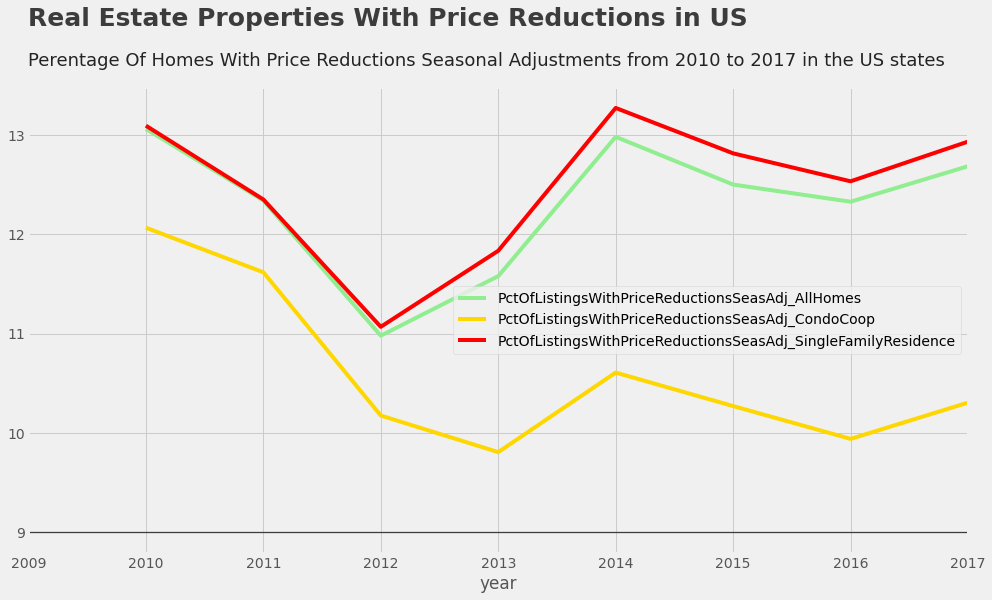

In [97]:
plt.figure(figsize=(15,8));

data.groupby(data['year'])['PctOfListingsWithPriceReductionsSeasAdj_AllHomes'].median().plot(linewidth=4, c='lightgreen', legend=False)
data.groupby(data['year'])['PctOfListingsWithPriceReductionsSeasAdj_CondoCoop'].median().plot(linewidth=4, c='gold')
data.groupby(data['year'])['PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence'].median().plot(linewidth=4, c='red')

plt.legend(loc='center right')

# Generate a bolded horizontal line at y = 0
plt.axhline(y = 9, color = 'black', linewidth = 1.3, alpha = .7)
# Add an extra vertical line by tweaking the range of the x-axis
plt.xlim(left = 2009, right = 2017)

# Adding a title and a subtitle
plt.text(x = 2009, y = 14.1, s = "Real Estate Properties With Price Reductions in US",
               fontsize = 25, weight = 'bold', alpha = .75)
plt.text(x = 2009, y = 13.7,
               s = 'Perentage Of Homes With Price Reductions Seasonal Adjustments from 2010 to 2017 in the US states',
              fontsize = 18, alpha = .85);

In [98]:
#prepares the data in the right format for use with Prophet
state_df=data_year[['Date', 'ZHVI_AllHomes']]
state_df.dropna(inplace=True)
#prohet expects data in the format as DF('ds','y)
state_df['ds']=state_df['Date']
state_df['y']=np.log(state_df['ZHVI_AllHomes'])

C:\Users\Checkout\AppData\Local\Temp\ipykernel_7428\3944669137.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Checkout\AppData\Local\Temp\ipykernel_7428\3944669137.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Checkout\AppData\Local\Temp\ipykernel_7428\3944669137.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [99]:
#The ds column contains the dates, and the y column contains the logarithm of the median home value
del state_df['Date']
del state_df['ZHVI_AllHomes']
state_df.head()

,ds,y
3,1996-04-30,11.969717
9,1996-04-30,12.334466
19,1996-04-30,11.829924
27,1996-04-30,11.851538
48,1996-05-31,11.969084


In [100]:
#training dataset
train= state_df[:len(state_df) - 40]
train.shape

(1207, 2)

In [101]:
test= state_df[len(state_df) - 40:]
test.shape

(40, 2)

In [102]:
m = Prophet()
m.fit(state_df);

23:05:54 - cmdstanpy - INFO - Chain [1] start processing
23:05:54 - cmdstanpy - INFO - Chain [1] done processing


## making predictions with Prophet for 40 days into the future

In [103]:
pred = m.make_future_dataframe(periods=40) # days for test split
pred.tail()

,ds
292,2017-10-06
293,2017-10-07
294,2017-10-08
295,2017-10-09
296,2017-10-10


predicted values of the log of the median home values in the US states for the next 40 periods starting from 2017-10-06 to 2017-10-10. The column yhat shows the predicted values, while yhat_lower and yhat_upper give the lower and upper uncertainty level

In [104]:
forecast = m.predict(pred)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
292,2017-10-06,13.043210,12.810342,13.271179
293,2017-10-07,13.043833,12.816576,13.273127
294,2017-10-08,13.044748,12.813059,13.261037
295,2017-10-09,13.045926,12.816438,13.273450
296,2017-10-10,13.047329,12.808133,13.258564


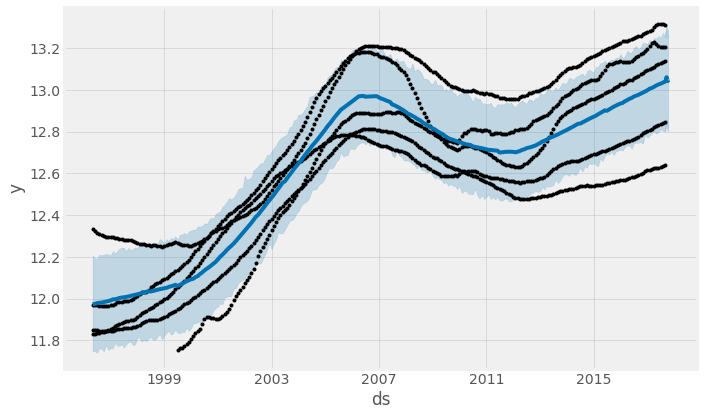

In [105]:
m.plot(forecast);

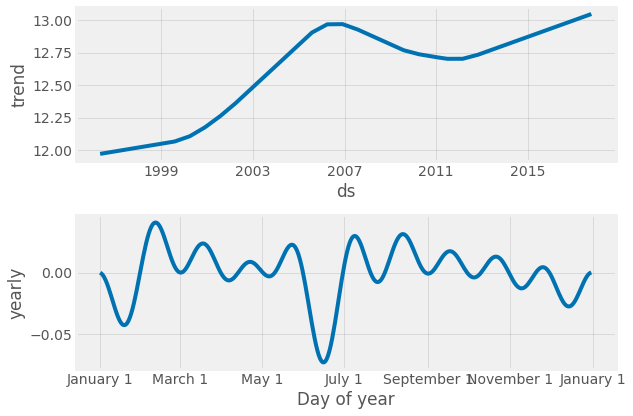

In [106]:
m.plot_components(forecast);

In [107]:
#mean absolute percentage error (MAPE) between the actual values and predicted values

In [108]:
y_actual = test.y.values
y_pred = forecast.iloc[-40:, 2].values

denominator = (np.abs(y_actual) + np.abs(y_pred))
diff = np.abs(y_actual - y_pred) / denominator
diff[denominator == 0] = 0.0

In [109]:
# Calculate evaluation metrics
#performance of the Prophet model on the test data appears to be moderate
mse = mean_squared_error(y_actual, y_pred)
mae = mean_absolute_error(y_actual, y_pred)

print('Mean Squared error: ',mse)
print('Mean absolute error: ',mae)

Mean Squared error:  0.103165854642934
Mean absolute error:  0.27701318540943104
